# Quickstart to Selene

This tutorial uses the same data and setup as [`getting_started_with_selene.ipynb`](https://github.com/FunctionLab/selene/blob/master/tutorials/getting_started_with_selene/getting_started_with_selene.ipynb), but excludes all the background and data preparation work.
It shows the minimal amount of code needed to run Selene itself.

## Setup

**Architecture:** We use a file `deeperdeepsea.py` that doubles the number of convolutional layers that DeepSEA has. Note that the architecture file has the same format as [`deepsea.py`](https://github.com/FunctionLab/selene/blob/master/models/deepsea.py) (it contains the model architecture class, the method `criterion`, and the method `get_optimizer(lr)`). All model architecture files should have these 3 components. 

**Data:** We downloaded the measurements for transcription factor CTCF in cell type GM12878 from ENCODE. More information about the data is in the "Getting Started" tutorial. For data sampling, we are going to use Selene's `IntervalsSampler`, which will create samples on-the-fly by randomly selecting positions from a specific set of regions (see note) and using the **1000bp** sequences centered at those positions as the inputs to the model. Further, to assign the targets associated with each 1000bp sequence, the sampler queries a tabix-indexed targets file for the genomic features that overlap with the middle **200bp** region of the sequence. **You can refer to [simple_train.yml](https://github.com/FunctionLab/selene/blob/master/tutorials/quickstart_training/simple_train.yml) to see how this is specified.**

_Note: The regions we use are regions from the DeepSEA dataset which contain at least 1 transcription factor._


## Download the data

Download the compressed data from here:

```sh
wget https://zenodo.org/record/1319886/files/selene_quickstart_tutorial.tar.gz
```

Extract it and `mv` all files from the extracted directory `selene_quickstart_tutorial` to the current directory.

In [1]:
%matplotlib inline
from selene_sdk.utils import load_path
from selene_sdk.utils import parse_configs_and_run

Note that these are also the only 2 lines of code in the Selene repository's command-line script [`selene_cli.py`](https://github.com/FunctionLab/selene/selene_cli.py).

Before running `load_path` on `simple_train.yml`, please edit the YAML file to include the absolute path of the model file (`./data/deeperdeepsea.py` is the relative path).

Currently, the model is set to train on GPU. If you do not have CUDA on your machine, please set `use_cuda` to `False` in the configuration file. (This will slow down the process considerably.)

In [2]:
configs = load_path("./simple_train.yml",
                    # TODO: this should be the default. It is always False in our case.
                    instantiate=False)

Outputs and logs saved to ./training_outputs
2018-12-07 14:06:58,532 - Creating validation dataset.
2018-12-07 14:07:17,469 - 18.934181690216064 s to load 32000 validation examples (500 validation batches) to evaluate after each training step.
2018-12-07 14:34:51,148 - [STEP 2000] average number of steps per second: 1.2
2018-12-07 14:36:37,083 - validation average roc_auc: 0.9548365752551019
2018-12-07 14:36:37,085 - validation average average_precision: 0.40619643342580675
2018-12-07 14:36:37,686 - training loss: 0.04454858973622322
2018-12-07 14:36:37,687 - validation loss: 0.05538478693459183
2018-12-07 15:04:06,546 - [STEP 4000] average number of steps per second: 1.2
2018-12-07 15:05:52,657 - validation average roc_auc: 0.9617758988360969
2018-12-07 15:05:52,660 - validation average average_precision: 0.4337759280031035
2018-12-07 15:05:53,280 - training loss: 0.04048091545701027
2018-12-07 15:05:53,282 - validation loss: 0.05262729346845299
2018-12-07 15:33:18,486 - [STEP 6000] a

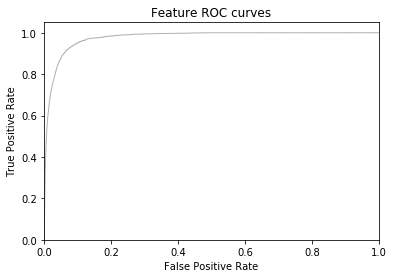

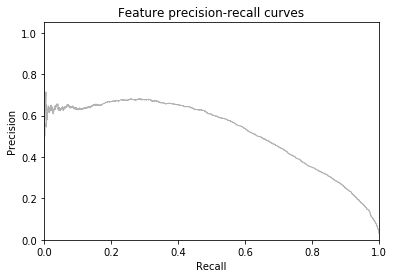

In [3]:
parse_configs_and_run(configs, lr=0.01)